## Airbnb data exploration

### Import modules and stored variables

In [140]:
import pandas as pd
import seaborn as sb
from IPython.display import Markdown
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns

%store -r SOURCE

#remove limit displaying rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Load data into DataFrame

In [141]:
data_frame = pd.read_csv('../data_ingestion/data'+f'/{SOURCE["city"]}'+'.csv',
                         sep=',',
                         header=0,
                         encoding='utf-8',
                         encoding_errors='strict',
                         on_bad_lines='error')
data_frame.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20220914061546,2022-09-14,city scrape,Hyde Park - Walk to UChicago,You are invited to be the sole Airbnb guest in...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, IL",My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1,1,"['email', 'phone']",t,t,"Chicago, Illinois, United States",Hyde Park,NaN,41.787900,-87.587800,Private room in condo,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Hot water kettle"", ""Conditioner"", ""Heating"",...",$110.00,3,89,3,3,1125,1125,3.0,1125.0,NaN,t,13,25,50,320,2022-09-14,207,19,2,2015-01-09,2022-09-09,4.99,4.98,4.99,4.99,4.99,4.96,4.94,R17000015609,t,1,0,1,0,2.21
1,7126,https://www.airbnb.com/rooms/7126,20220914061546,2022-09-14,city scrape,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,https://www.airbnb.com/users/show/17928,Sarah,2009-05-19,"Chicago, IL",We live in Chicago. We love to travel and see ...,within an hour,100%,96%,t,https://a0.muscache.com/im/users/17928/profile...,https://a0.muscache.com/im/users/17928/profile...,Ukrainian Village,2,2,"['email', 'phone']",t,t,"Chicago, Illinois, United States",West Town,NaN,41.901660,-87.680210,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Hot water kettle"", ...",$91.00,2,60,2,2,1125,1125,2.0,1125.0,NaN,t,11,22,52,320,2022-09-14,459,51,2,2009-07-03,2022-08-28,4.68,4.84,4.56,4.90,4.87,4.88,4.74,R21000075737,f,1,1,0,0,2.86
2,10945,https://www.airbnb.com/rooms/10945,20220914061546,2022-09-14,city scrape,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,https://www.airbnb.com/users/show/33004,At Home Inn,2009-08-21,"Chicago, IL","Hi, we're Bob and Liz Biddle, long time Chicag...",within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/e23d4...,https://a0.muscache.com/im/pictures/user/e23d4...,Old Town,9,82,"['email', 'phone', 'work_email']",t,t,NaN,Lincoln Park,NaN,41.911960,-87.639810,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Washer"", ""Patio or balcony"", ""Heating"", ""Pri...",$157.00,4,180,3,4,1125,1125,4.0,1125.0,NaN,t,4,23,47,137,2022-09-14,56,23,2,2014-04-28,2022-08-23,4.63,4.73,4.80,4.79,4.77,4.98,4.64,2209984,t,9,9,0,0,0.55
3,12140,https://www.airbnb.

### Data basic informations

In [142]:
data_frame.shape

(7414, 75)

DataFrame contains 7414 rows and 75 columns.

In [143]:
data_frame.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [144]:
float_columns = list(data_frame.select_dtypes(['float']).columns)
float_columns_num = len(float_columns)

object_columns = list(data_frame.select_dtypes(['object']).columns)
object_columns_num = len(object_columns)

int_columns = list(data_frame.select_dtypes(['int']).columns)
int_columns_num = len(int_columns)

Markdown(f'Set contains: {float_columns_num} columns in float64 type, {int_columns_num} columns in int64 type and {object_columns_num} columns in object type.')

Set contains: 17 columns in float64 type, 23 columns in int64 type and 35 columns in object type.

In [145]:
data_frame.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.414000e+03,7.414000e+03,7.414000e+03,7414.000000,7414.000000,0.0,7414.000000,7414.000000,7414.000000,0.0,6818.000000,7347.000000,7414.000000,7414.000000,7414.000000,7414.000000,7.414000e+03,7.414000e+03,7414.000000,7.414000e+03,0.0,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,6102.000000,6087.000000,6087.000000,6087.000000,6086.000000,6087.000000,6087.000000,7414.000000,7414.000000,7414.000000,7414.000000,6102.000000
mean,1.665817e+17,2.022091e+13,1.507122e+08,301.448206,336.689237,NaN,41.895044,-87.666464,4.280281,NaN,1.857143,2.235606,14.580388,660.541543,15.864311,64.701106,8.697828e+05,5.793927e+06,62.623011,4.827319e+06,NaN,10.776639,28.335986,48.694497,200.869706,46.316968,14.196520,1.356892,4.720855,4.785423,4.727955,4.845172,4.839510,4.762888,4.676813,44.548692,42.726059,1.572700,0.136633,1.986147
std,2.814598e+17,0.000000e+00,1.421663e+08,1038.089250,1138.385306,NaN,0.063897,0.049830,2.918599,NaN,1.115775,1.702290,41.305189,478.390193,51.624467,188.226668,4.319221e+07,1.113938e+08,182.296021,9.427903e+07,NaN,9.632279,20.314152,30.883010,132.220453,82.506890,25.479147,2.093706,0.468566,0.390578,0.413793,0.348361,0.369918,0.383756,0.426281,133.163519,133.611586,5.054543,1.297124,1.936698
min,2.384000e+03,2.022091e+13,2.153000e+03,0.000000,0.000000,NaN,41.630450,-87.950370,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,2.000000e+00,1.000000,2.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.813292e+07,2.022091e+13,3.043362e+07,1.000000,2.000000,NaN,41.867598,-87.689628,2.000000,NaN,1.000000,1.000000,2.000000,120.000000,2.000000,2.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,NaN,0.000000,7.000000,20.000000,74.000000,2.000000,0.000000,0.000000,4.660000,4.750000,4.650000,4.830000,4.830000,4.710000,4.610000,1.000000,1.000000,0.000000,0.000000,0.560000
50%,4.578821e+07,2.022091e+13,1.074344e+08,4.000000,5.000000,NaN,41.898110,-87.659460,4.000000,NaN,2.000000,2.000000,2.000000,999.000000,2.000000,3.000000,1.125000e+03,1.125000e+03,3.000000,1.125000e+03,NaN,9.000000,31.000000,57.000000,222.000000,14.000000,5.000000,0.000000,4.850000,4.900000,4.860000,4.950000,4.950000,4.880000,4.790000,3.000000,1.000000,0.000000,0.000000,1.600000
75%,5.545011e+17,2.022091e+13,2.430356e+08,15.000000,23.000000,NaN,41.938450,-87.632600,6.000000,NaN,2.000000,3.000000,32.000000,1125.000000,32.000000,32.000000,1.125000e+03,1.125000e+03,32.000000,1.125000e+03,NaN,18.000000,46.000000,75.000000,333.000000,55.000000,22.000000,2.000000,4.970000,5.000000,4.990000,5.000000,5.000000,5.000000,4.900000,12.000000,8.000000,1.000000,0.000000,2.970000
max,7.149119e+17,2.022091e+13,4.791517e+08,4050.000000,6605.000000,NaN,42.037660,-87.507940,16.000000,NaN,12.000000,21.000000,1125.000000,1125.000000,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,2600.000000,1284.000000,68.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,525.000000,525.000000,49.0000

### Check int and float columns

In [146]:
float_columns

['neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [147]:
int_columns

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'accommodates',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

### Report

In [148]:
report = sv.analyze(data_frame, pairwise_analysis='off')
#report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sweetviz/series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sweetviz/series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sweetviz/series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()


### Check how many columns have missing values:

above 80%

In [149]:
list_of_columns = [*data_frame.columns]
all_rows = data_frame.shape[0]

missing_values_above_80_percent = [item for item in list_of_columns if (data_frame[item].isna().sum())/all_rows > 0.8]
missing_values_above_80_percent


['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']

below 10%

In [150]:
missing_values_below_10_percent = [item for item in list_of_columns if (data_frame[item].isna().sum())/all_rows < 0.1]
missing_values_below_10_percent

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'cal

## Categorical data analysis

Let's examine object columns containing categorical values.

In [151]:
cat_cols = [*data_frame.select_dtypes(include=['object']).columns]
cat_cols

['listing_url',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'price',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'license',
 'instant_bookable']

Due to the computing power of the computer, from the list above, we will select for analysis only those columns that do not have more than 250 different values.

In [152]:
cat_cols = [item for item in cat_cols if len(data_frame[item].unique()) < 250]
cat_cols

['last_scraped',
 'source',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'has_availability',
 'calendar_last_scraped',
 'instant_bookable']

Analysis and grouping within categorical columns.

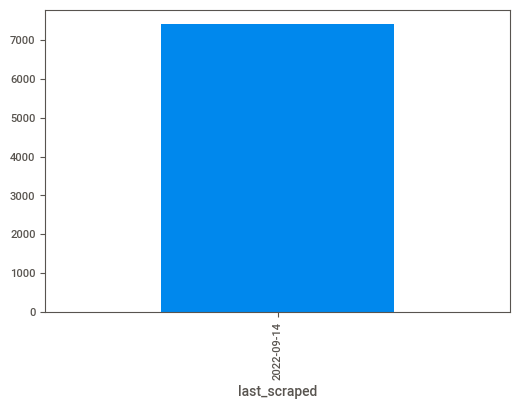

Summary for: last_scraped





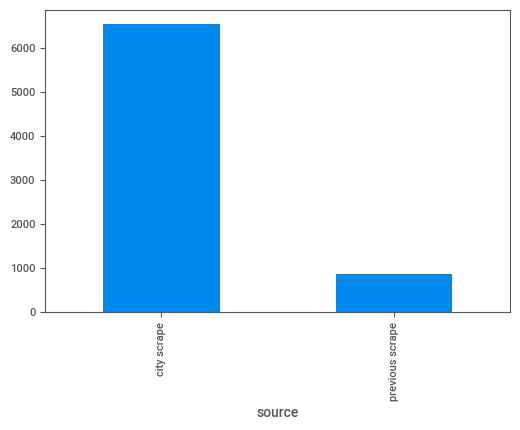

Summary for: source



host_location
Algiers, Algeria                    1
Alsip, IL                           1
American Canyon, CA                 4
Anchorage, AK                       1
Ann Arbor, MI                       1
Antioch, IL                         1
Arizona, United States              1
Arlington Heights, IL               4
Arlington, TX                       1
Arlington, VA                       1
Asheville, NC                       3
Atlanta, GA                         8
Aurora, IL                          3
Austin, TX                          3
Baltimore, MD                       2
Barrington, IL                      4
Batavia, IL                         1
Bellwood, IL                        1
Belmont, CA                         2
Bensenville, IL                     4
Berwyn, IL                          5
Birmingham, MI                      1
Bloomingdale, IL                    1
Bloomington, IN                     2
Blue Island, IL                     2
Boca Raton, F

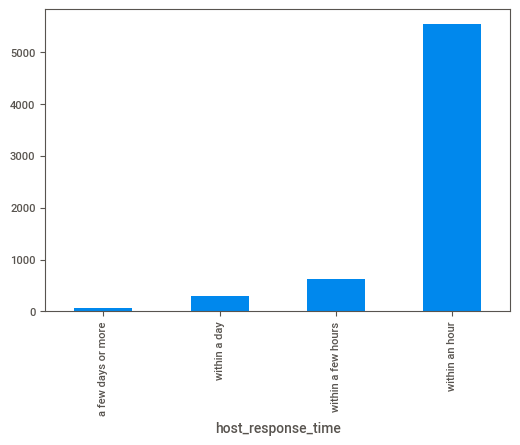

Summary for: host_response_time





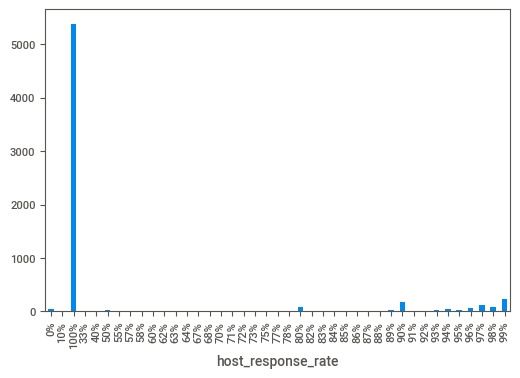

Summary for: host_response_rate





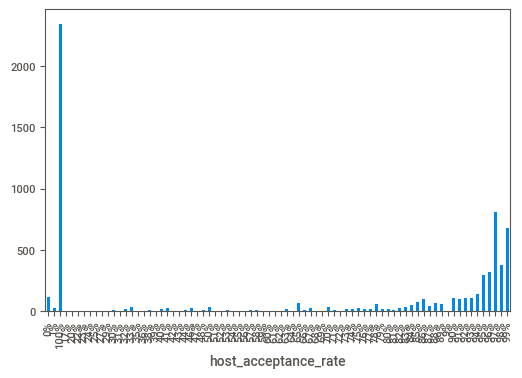

Summary for: host_acceptance_rate





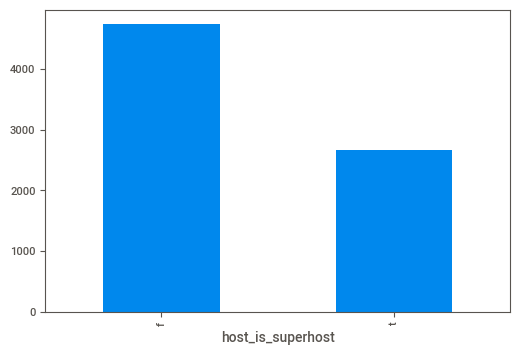

Summary for: host_is_superhost



host_neighbourhood
Albany Park                                     41
Andersonville                                   39
Archer Heights                                   5
Armour Square                                   43
Ashburn                                          3
Auburn Gresham                                  11
Austin                                          31
Avalon Park                                      1
Avondale                                       156
Back of the Yards                               29
Belmont Central                                  5
Belmont Cragin                                   9
Belmont Gardens                                  7
Belmont Heights                                  1
Beverly                                          9
Big Oaks                                         1
Boystown                                         7
Brickell                                         1
Bridgeport                   

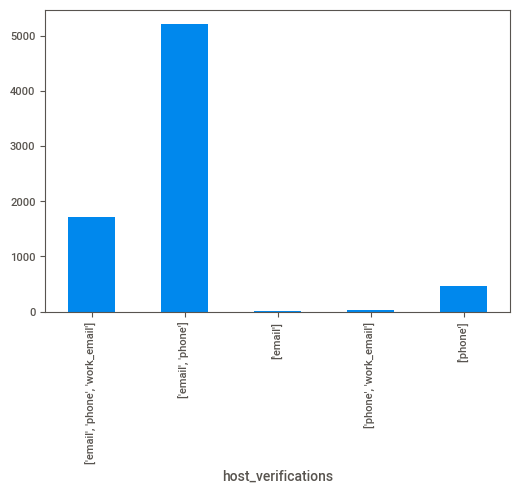

Summary for: host_verifications





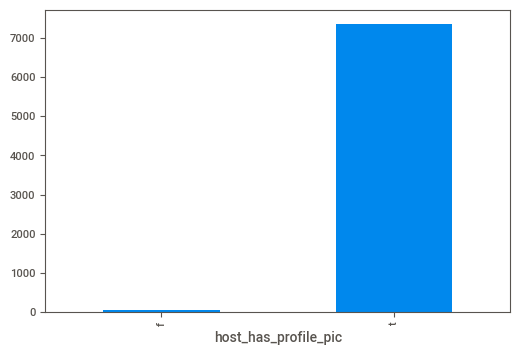

Summary for: host_has_profile_pic





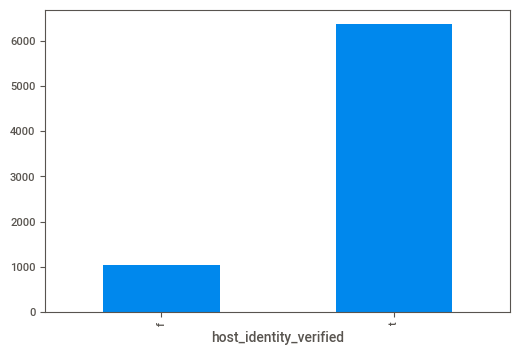

Summary for: host_identity_verified





/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33437 (\N{CJK UNIFIED IDEOGRAPH-829D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21733 (\N{CJK UNIFIED IDEOGRAPH-54E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


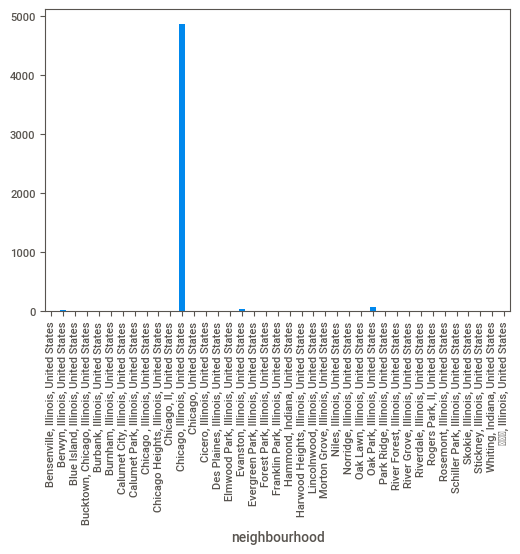

Summary for: neighbourhood





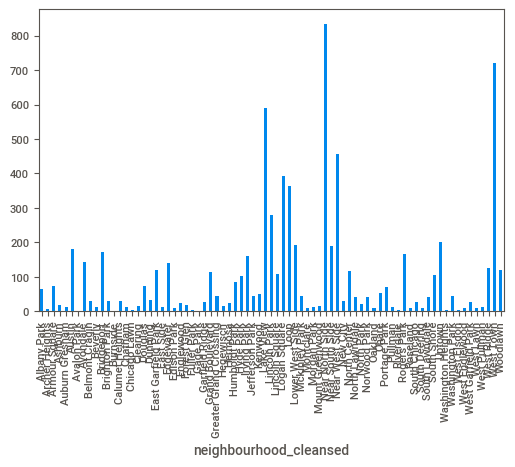

Summary for: neighbourhood_cleansed





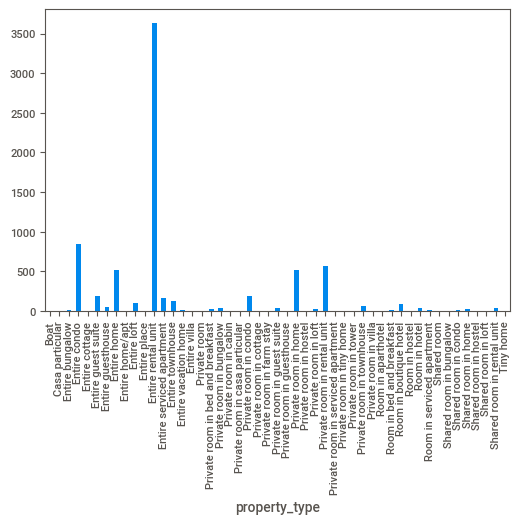

Summary for: property_type





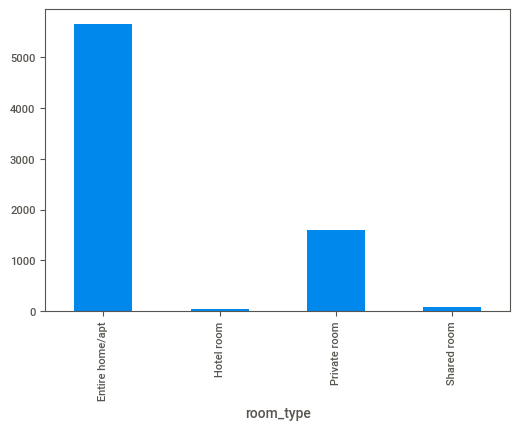

Summary for: room_type





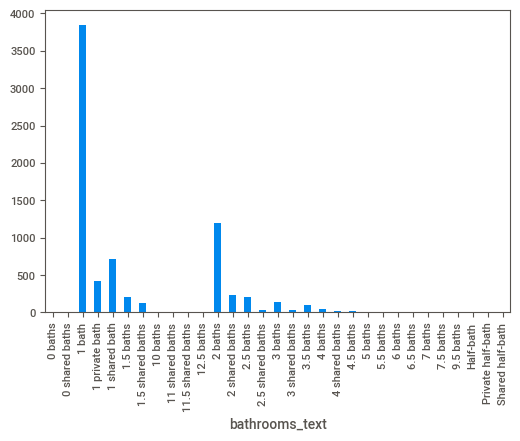

Summary for: bathrooms_text





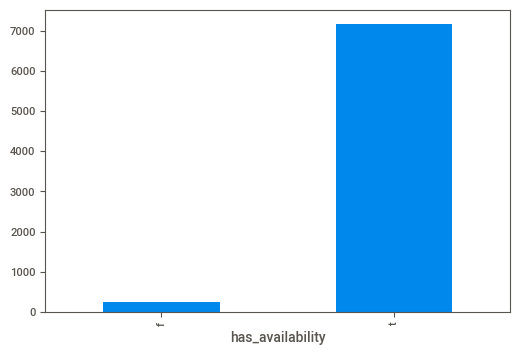

Summary for: has_availability





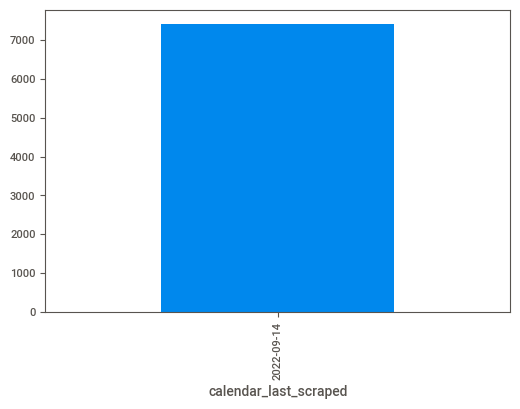

Summary for: calendar_last_scraped





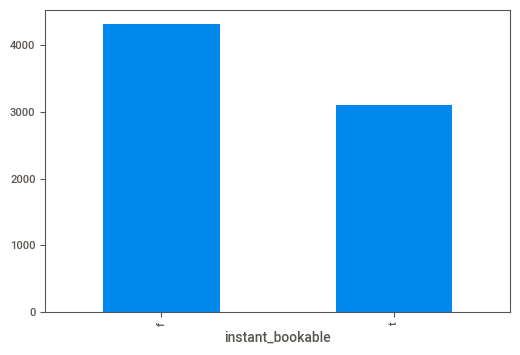

Summary for: instant_bookable





In [159]:
def categorical_columns_summary(column):
    if len(data_frame[column].unique()) < 80:
        grouped = data_frame.groupby(column)[column].count()
        grouped.plot.bar()
        return plt.show()
    else:
        result = data_frame.groupby(column)[column].count()
        print(result)
        return result

for col in cat_cols:
    result = categorical_columns_summary(col)
    print(f'Summary for: {col}'+'\n\n\n')

### Looking for correlations between float columns

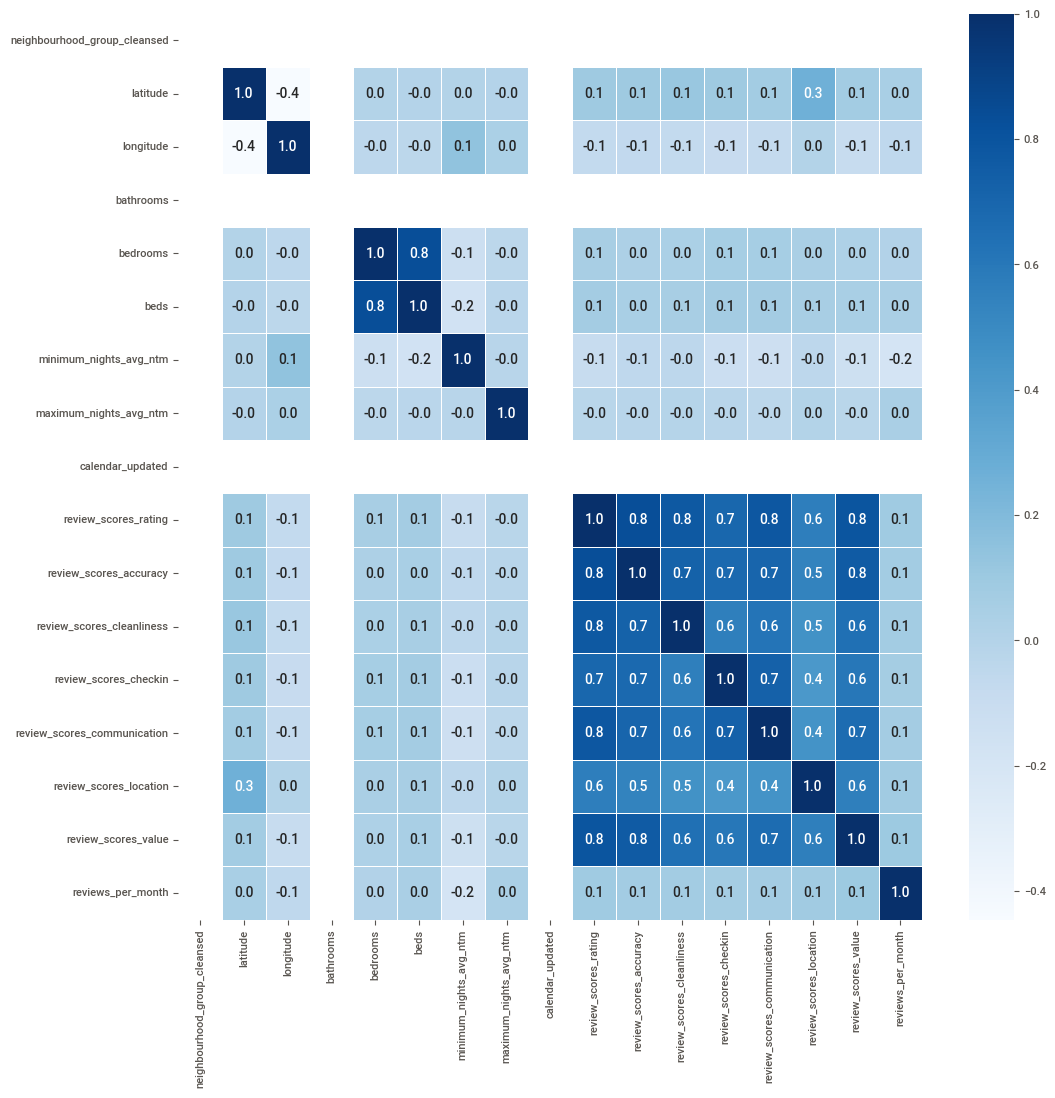

In [154]:
data_frame.corr()
numeric_columns_corr = data_frame.select_dtypes(include=['float'])
corr = numeric_columns_corr.corr()

plt.figure(figsize=(12,12))
sb.heatmap(corr, cmap="Blues", annot=True, fmt='.1f', linewidth=.5)
plt.show()

Saving variables for use in the next step for data cleaning.

In [155]:
%store data_frame
%store list_of_columns
%store missing_values_above_80_percent
%store missing_values_below_10_percent 
%store int_columns
%store float_columns
%store object_columns

Stored 'data_frame' (DataFrame)
Stored 'list_of_columns' (list)
Stored 'missing_values_above_80_percent' (list)
Stored 'missing_values_below_10_percent' (list)
Stored 'int_columns' (list)
Stored 'float_columns' (list)
Stored 'object_columns' (list)
